# Information Visualization
## Coursework 2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from countries import countries
from experiment import BarExperiment, MapExperiment

%matplotlib inline

In [2]:
country_names = [c['name'] for c in countries]
pollution = pd.DataFrame(np.random.uniform(0, 100, (20, len(country_names))),
                         columns=country_names,
                         index=reversed(pd.date_range(start='2000', end='2020', freq='Y')))
pollution.head()

,Andorra,Afghanistan,Antigua and Barbuda,Albania,Armenia,Angola,Argentina,Austria,Australia,Azerbaijan,...,Saint Vincent and the Grenadines,Samoa,Serbia,South Africa,Spain,Sri Lanka,Swaziland,Switzerland,United Arab Emirates,United Kingdom
2019-12-31,53.254339,23.286425,29.125321,84.889438,65.223267,12.434459,75.008191,4.102646,27.134805,49.602298,...,89.738762,81.394334,87.256661,46.901118,10.009067,60.261564,75.622227,55.608752,77.995343,14.208806
2018-12-31,16.420972,45.630916,17.315031,35.440776,62.400206,23.449674,54.695582,93.353357,55.372407,81.810172,...,60.626399,69.513285,7.794795,79.439366,73.066276,81.968660,46.281353,98.739220,48.454595,15.943667
2017-12-31,79.332480,28.631099,87.327322,3.498861,30.100857,0.803515,34.893469,19.514440,73.291664,80.672707,...,51.099038,81.828805,63.655244,54.113803,34.126333,43.068564,62.008751,81.166062,22.090508,34.531339
2016-12-31,70.720457,82.464274,1.399279,72.812612,80.960641,8.707267,40.748011,39.468649,83.399172,13.380633,...,51.318562,44.694536,68.114290,64.111546,20.210733,65.576373,51.914188,73.638437,54.625828,26.591366
2015-12-31,52.653704,52.362453,68.192158,66.117763,1.191098,95.992428,51.303078,80.960307,45.467704,16.142951,...,20.943696,70.638174,0.238322,47.046190,13.418759,82.705594,32.271399,97.153306,61.337428,52.900677


In [3]:
pollution = pollution.sum().sort_values(ascending=False).iloc[:20]

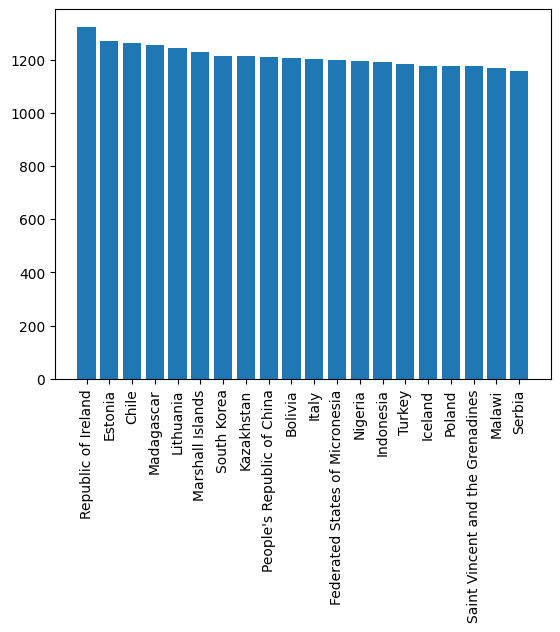

In [4]:
plt.bar(pollution.index, pollution)
plt.xticks(rotation=90)
plt.show()

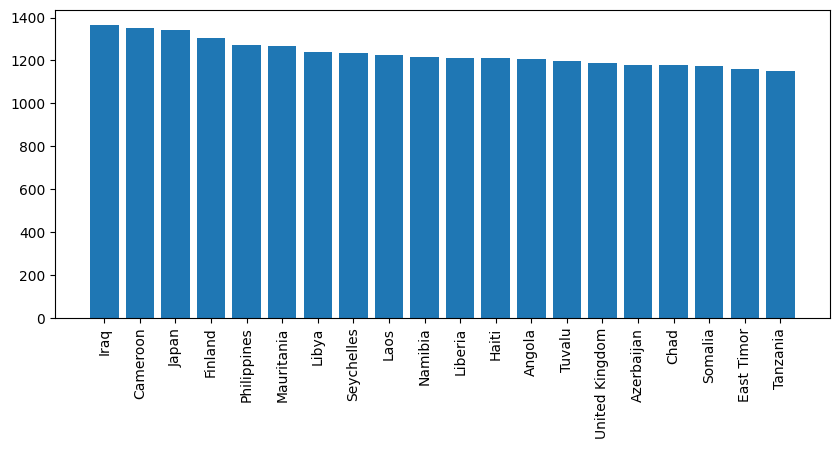

Which country pollutes the most?
Seychelles:                             1
Libya:                                  2
Tuvalu:                                 3
Iraq:                                   4
Cameroon:                               5


 4


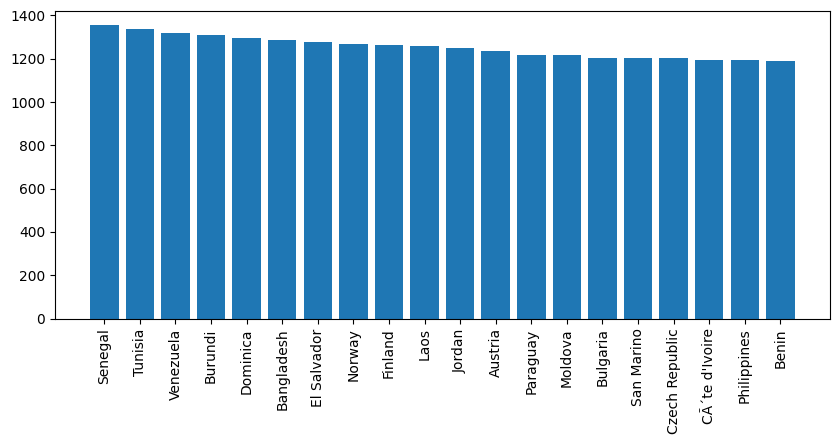

Which country pollutes the most?
El Salvador:                            1
Senegal:                                2
Finland:                                3
CÃ´te d'Ivoire:                         4
Venezuela:                              5


 2


Precentage of correct answers:          1.0
Mean respnse time:                      3.4
Response time standard deviation:       0.45


In [5]:
be = BarExperiment(n=2)
be.run()
be.save_data()
be.print_results()